<img src="../images/cads-logo.png" width=200 align=left>
<img src="../images/python-logo.png" width=200 align=right>

In [3]:
%matplotlib inline 
# utk plot dalam jupyter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# At the time of creating this material, there was a versioning issue 
# between seaborn and numpy that results in a FutureWarning. This does 
# not affect the results and will presumably be fixed in some update cycle 
# but creates an annoying warning message we don't want to see every time.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualization with Seaborn
- [Visualization with Seaborn](#Visualization-with-Seaborn)
- [Introduction](#Introduction)
- [Relationships Between Continuous Variables](#Relationships-Between-Continuous-Variables)
    - [Scatter plots](#Scatter-plots)
    - [Line plots](#Line-plots)
        - [Aggregating Data](#Aggregating-Data)
        - [Plotting Dates](#Plotting-Dates)
    - [Exercises](#Exercises)
- [Relationships to Categorical Variables](#Relationships-to-Categorical-Variables)
    - [Categorical Scatter Plots](#Categorical-Scatter-Plots)
    - [Distribution Plots](#Distribution-Plots)
    - [Exercises](#Exercises)
- [Element Ordering](#Element-Ordering)
- [Facetting](#Facetting)
- [Under the Hood](#Under-the-Hood)
- [Customizing Plots](#Customizing-Plots)
    - [Plot Text and Axis Labels](#Plot-Text-and-Axis-Labels)
    - [Axis Limits](#Axis-Limits)
    - [Color](#Color)
- [Themes](#Themes)
- [Saving Plots](#Saving-Plots)
- [Exercises](#Exercises)

## Introduction
The base library for visualization in Python is `matplotlib`. Nearly every other library for visualizing data is built on top of it. However, despite being incredibly flexible and powerful, `matplotlib` is difficult to use for data analysis. Instead of being developed with one single API design, it has grown organically as every new update needed to ensure backwards compatibility with old code (otherwise all libraries building on it would break until updated). This continuity is part of what makes it so attractive and simultaneously complicated.

Furthermore, `matplotlib` is designed to visualize *anything*, not just data. Because we're most interested in examining and presenting relationships between data, however, we will use a different library, `seaborn`. This library is specifically designed for statistical data visualization and provides a consistent and easy-to-use API.

Matplotlib can be used in iPython, Python etc.

`Seaborn` built on top of matplotlib.Works well with pandas dataframe. Good choice for EDA, to extract pattern from data efficiently.

Can doing machine learning, kita nak tau relationship between independant variables and terget veriables. Contoh: predict amount of sales. Using visualization, we can see wheteher there are correlation between independant variables and independant variables.

To visualize numerical and categorical variables.Categorical variable have finite number of categories. Example: number of cylinder, number of gears in cars, payment method etc. Numerical variables can be classified as discrete and continous variable. Example of discrete variables: number of customer complaints, number of students in class, result of rolling two die. Example of continous variable: time taken to receive payment, height, length of leaf.

For discrete variable, kalau byk sgt categories, then boleh jadi numerical. Kalau category sikit, then visualize pakai categorical.

## Relationships Between Continuous Variables
Visualizing the relationship between continuous variables is as simple as plotting the values of both variables for each data entry on the x- and y-axes of a plot.

### Scatter plots

In [4]:
tips = pd.read_csv("../data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


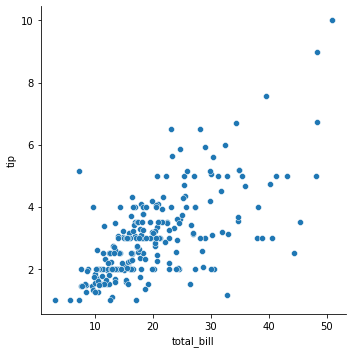

In [5]:
sns.relplotlot(x="total_bill", y="tip", data=tips, kind = 'scatter')
# relationship plot by default --> scatter plot
# nak tau relationship between total bill and tips
# when total bill increase, tip increase

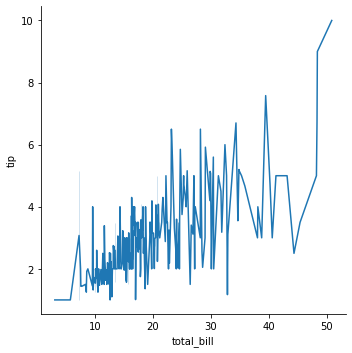

In [9]:
sns.relplot(x="total_bill", y="tip", data=tips, kind = 'line')

We may, of course, be interested in more than just the x- and y- values. We can use additional arguments to `relplot(...)` to distinguish data points

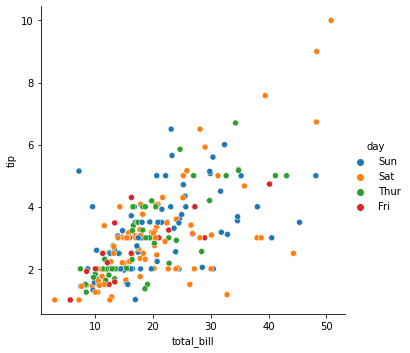

In [10]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
# assign variable 'day' to hue
# for each 'day' akan dapat relationship plot
# obs: most tip got at saturday

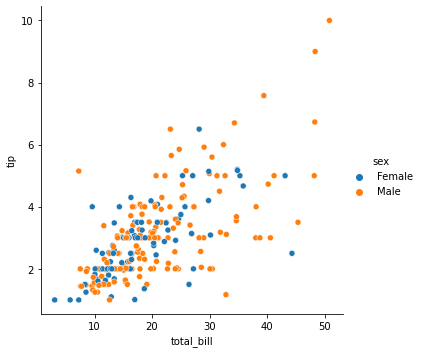

In [11]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)
# obs: some of the highest tips belong to male

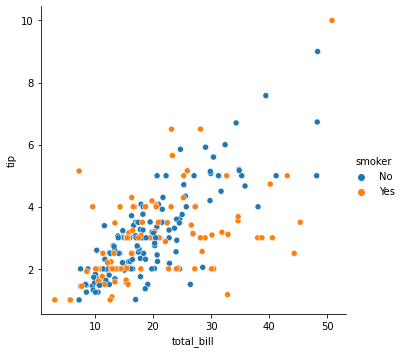

In [12]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
# majority non-smoker dpt tips

Points are now colored differently depending on whether the entry in the dataset corresponds to a smoker or not. We can do the same for the size and style aesthetics as well.

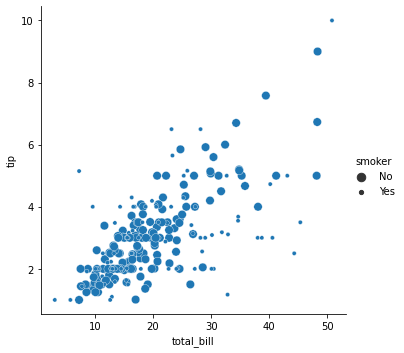

In [13]:
sns.relplot(x="total_bill", y="tip", size="smoker", data=tips)
# boleh nampak siapa yg majority dalam ni
# non smoker dpt majority tips

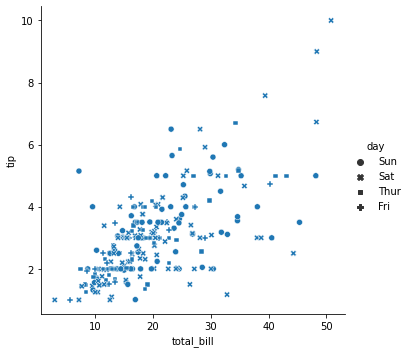

In [14]:
sns.relplot(x="total_bill", y="tip", style="day", data=tips)
# dpt 4 different shape for each group
# only for categorical variable

The aesthetic mappings can be combined as desired to visualize up to 5 dimensions in our datasets via the `x`, `y`, `hue`, `style`, and `size` arguments.

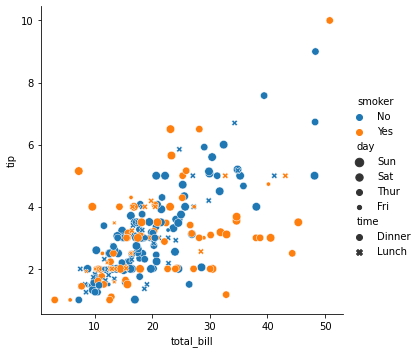

In [15]:
# all in one plot tapi nnti lagi complicated
sns.relplot(x="total_bill", y="tip", hue="smoker", size="day", style="time", data=tips)

Be warned that this will make plots extremely difficult to visualize parse.

The `hue` and `size` aesthetics have been categorical so far, meaning that distinct colors and sizes were chosen for each possible, discrete value of the dataframe columns they were applied to. They can also be applied to continuous, numerical variables. In this case, the color palette will automatically be set to a gradient. We will see further on how to customize colors.

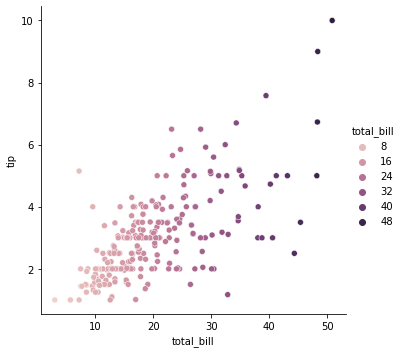

In [18]:
# total bill tu numerical variables, utk 'style' x sesuai
sns.relplot(x="total_bill", y="tip", hue="total_bill", data=tips)
# numerical sesuai hue/size

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

In [ ]:
sns.relplot(x="total_bill", y="tip", size="tip", data=tips, kind="scatter")

### Line plots
By default, `seaborn` will create a scatterplot. In the case of time series, we may be interested in creating a line plot to better visualize trends. We can do this by simply adding a `kind="line"` argument (by default, this argument is `kind="scatter"`).

In [21]:
df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum()})
df.head()

,time,value
0,0,-0.545913
1,1,-1.041012
2,2,-2.482311
3,3,-2.626794
4,4,-3.311399


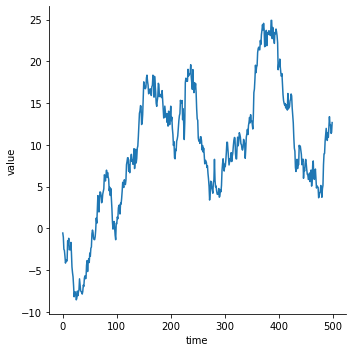

In [22]:
sns.relplot(x="time", y="value", kind="line", data=df)
# sesuai utk time series

By default, the dataframe will be sorted so that the x-values are in ascending order. This ensures that the line plot looks like a timeseries plot. This can, however, be disabled by setting `sort=False`. This could be useful, for example, if we are following the movement of an object or tracking how two variables change simultaneously through time.

In [24]:
# by default mmg susun data tu ascending order
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df

,x,y
0,0.041148,1.529754
1,0.923617,0.263861
2,1.219918,-0.384169
3,2.823002,-1.129004
4,4.012539,-1.045885
...,...,...
495,31.486835,-6.987245
496,31.232718,-7.272376
497,31.134117,-6.522142
498,31.157136,-5.753063


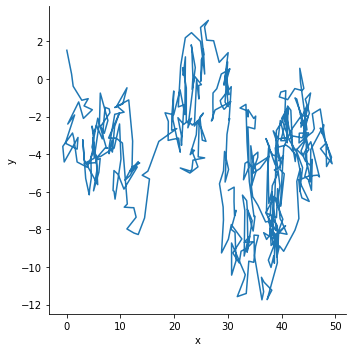

In [25]:
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)
# kalau nak track movement then set sort = false
# y dah x ikut ascending order

Line plots have the same aesthetic mapping possibilities as scatter plots, `hue`, `size`, and `style`, and they can also be combined in the same way. Notice how multiple lines are created and only points with the identical mapped aesthetics are connected. That means, if we create a line plot that maps a variable to `hue` and to `style`, we will end up with an individual line for each existing combination of variables in our data.

In [35]:
df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "A"})
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "B"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "C"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "South", "division": "A"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "South", "division": "B"}))

df=df.reset_index() #kalau ada error duplicate index
df

,index,time,value,region,division
0,0,0,-1.340803,North,A
1,1,1,-0.205951,North,A
2,2,2,-1.007540,North,A
3,3,3,-0.772585,North,A
4,4,4,-1.045934,North,A
...,...,...,...,...,...
2495,495,495,-3.441849,South,B
2496,496,496,-2.926691,South,B
2497,497,497,-1.436221,South,B
2498,498,498,-2.686231,South,B


In [33]:
df.head()

,time,value,region,division
0,0,-0.112648,North,A
1,1,-2.204655,North,A
2,2,-2.674655,North,A
3,3,-1.225769,North,A
4,4,1.298438,North,A


KeyboardInterrupt: 

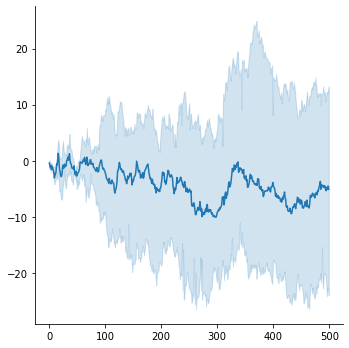

In [37]:
# Using size instead of style

# shading biru tu 'ci=True' tunjuk confidence interval
sns.relplot(x="time", y="value", kind="line", hue="region", data=df)

In [ ]:
# sesuai utk numerical plot
sns.relplot(x="time", y="value", kind="line", hue="region",style='division', data=df)

If using the `style` parameter, we can also decide whether we want dashes, dots, or both.

In [42]:
df = pd.DataFrame({
    "time": np.arange(20),
    "value": np.random.randn(20).cumsum(), 
    "region": "North"})
df = df.append(pd.DataFrame({
    "time": np.arange(20),
    "value": np.random.randn(20).cumsum(), 
    "region": "South"}))
df=df.reset_index() #kalau ada error duplicate index

df


,index,time,value,region
0,0,0,0.857557,North
1,1,1,0.966767,North
2,2,2,2.053027,North
3,3,3,2.653753,North
4,4,4,1.716518,North
5,5,5,0.521532,North
6,6,6,-0.242822,North
7,7,7,-0.585244,North
8,8,8,-0.593669,North
9,9,9,0.341008,North


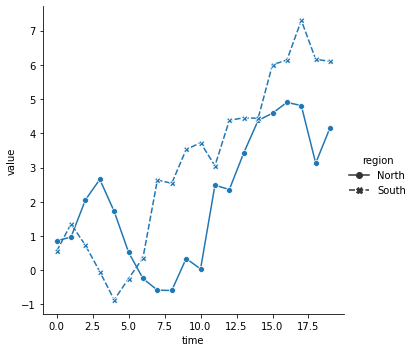

In [43]:
sns.relplot(x="time", y="value", kind="line", 
            style="region", markers=True, data=df)

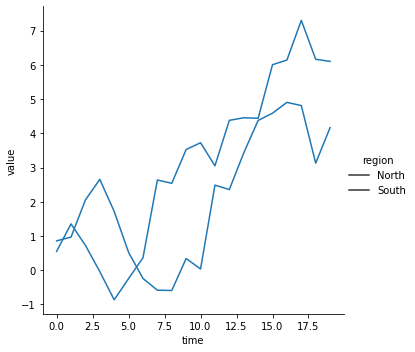

In [44]:
sns.relplot(x="time", y="value", kind="line", style="region", 
            dashes=False, data=df)

# xde markers

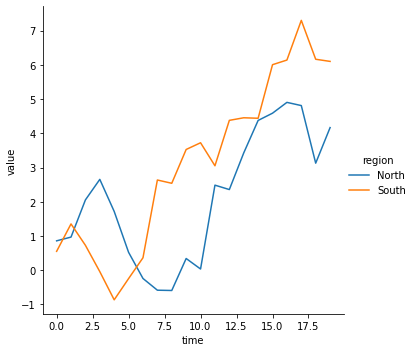

In [48]:
sns.relplot(x="time", y="value", kind="line", hue="region", 
            dashes=False,markers = True, data=df)

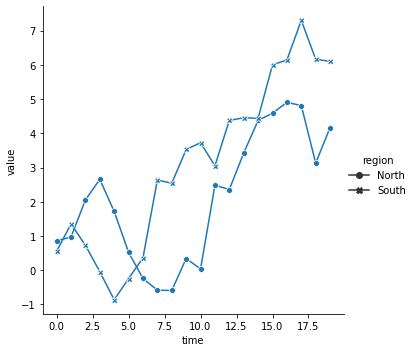

In [45]:
sns.relplot(x="time", y="value", kind="line", style="region", 
            dashes=False, markers=True, data=df)
# by default markers = false
# tolong highlight datapoint

#### Aggregating Data -- for smoother line
Often, we may have data with multiple measurements for the same data point, i.e. x-value. For example, we might have several temperature sensors in a device as a failsafe. `seaborn` can automatically aggregate y-values for identical x-values. By default, it plots the mean and the 95% confidence interval around this mean in either direction.

In [49]:
fmri = pd.read_csv("../data/fmri.csv")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [50]:
fmri.loc[(fmri["timepoint"] == 18)].head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513


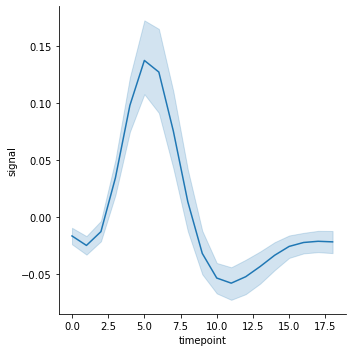

In [51]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
# line plot give average (mean) signal for each timepoint
# can be 95% confident that datapoint in timepoint 18, the range will be in that area

Because `seaborn` uses bootstrapping to compute the confidence intervals and this is a time-consuming process, it may be better to either switch to the standard deviation (`ci="sd"`) or turn this off entirely and only plot the mean (`ci=None`)

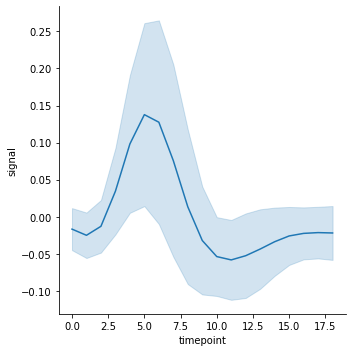

In [52]:
# pakai standard deviation
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

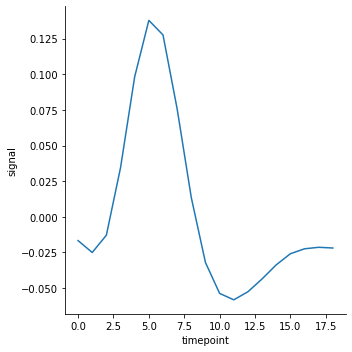

In [53]:
# kalau x nak shading
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri)

We can also change our `estimator` to any aggregation function, such as `np.median(...)`, `np.sum(...)`, or even `np.max(...)`. If we want to turn off aggregation then we just set `estimator=None`. Note that this will plot all measurements and cause the data to be plotted in strange ways.

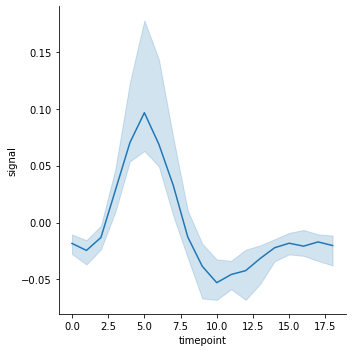

In [54]:
# x nak pakai mean
sns.relplot(x="timepoint", y="signal", kind="line", 
            estimator=np.median, data=fmri)

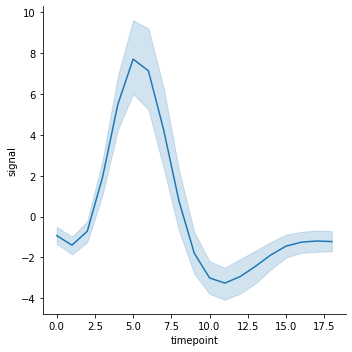

In [55]:
# pakai sum
sns.relplot(x="timepoint", y="signal", kind="line", 
            estimator=np.sum, data=fmri)

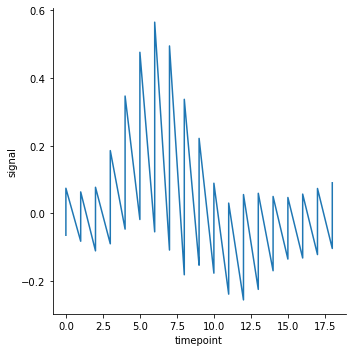

In [56]:
# kalau x nak pakai estimator, nak datavalue
sns.relplot(x="timepoint", y="signal", kind="line", 
            estimator=None, data=fmri)

#### Plotting Dates
Because they're so ubiquitous, `seaborn` natively supports the date format and will automatically format plots accordingly.

In [57]:
pd.date_range("2017-1-1", periods=5)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')

In [60]:
# frequency months
pd.date_range("1-1-2017", "22-3-2017", freq = 'M') 

DatetimeIndex(['2017-01-31', '2017-02-28'], dtype='datetime64[ns]', freq='M')

In [61]:
# frequency year
pd.date_range("1-1-2017", "22-3-2022", freq = 'Y') 

DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
               '2021-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [62]:
# frequency hourly
pd.date_range("1-1-2017", "22-2-2017", freq = 'H') 

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-02-21 15:00:00', '2017-02-21 16:00:00',
               '2017-02-21 17:00:00', '2017-02-21 18:00:00',
               '2017-02-21 19:00:00', '2017-02-21 20:00:00',
               '2017-02-21 21:00:00', '2017-02-21 22:00:00',
               '2017-02-21 23:00:00', '2017-02-22 00:00:00'],
              dtype='datetime64[ns]', length=1249, freq='H')

In [59]:
df = pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum()})
df.head() # bagi range of date, create 500 period of date

,time,value
0,2017-01-01,-1.408564
1,2017-01-02,-0.916706
2,2017-01-03,-0.685758
3,2017-01-04,2.032896
4,2017-01-05,2.271705


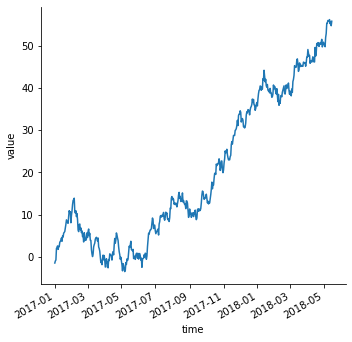

In [63]:
# some of function in seaborn will call function from matplotlib
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate() # seaborn use date format --> come from matplotlib

### Exercises
1. Load the `iris.csv` dataset and create a scatter plot relating the petal length to the petal width.

In [66]:
# Haseena
iris = pd.read_csv('../data/iris.csv')
iris.head()
sns.relplot(x = 'petal_width', y = 'petal_length', data = iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


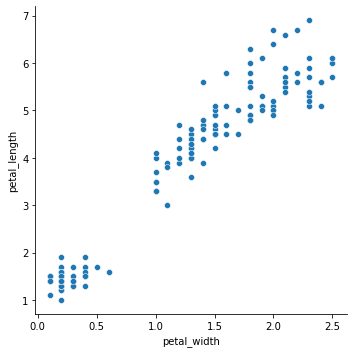

In [68]:
sns.relplot(x = 'petal_width', y = 'petal_length', data = iris)


2. Load the `diamonds.csv` dataset. Plot the carats versus the price again, but this time make sure that points are colored based on the cut.

In [69]:
df = pd.read_csv('../data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


KeyboardInterrupt: 

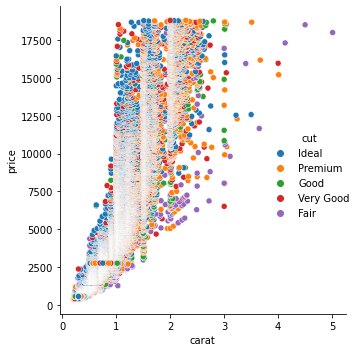

In [72]:
sns.relplot(x = 'carat', y = 'price' ,hue = 'cut',data = df)

3. Load the `mpg.csv` dataset and create a line plot relating the mean `mpg` to the `model_year`. Make sure each country of `origin` is shown in a separate line style.

In [73]:
car = pd.read_csv('../data/mpg.csv')
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


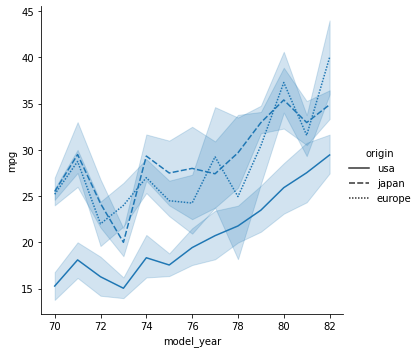

In [76]:
# Haseena
sns.relplot(x="model_year", y="mpg", kind="line", style='origin',ci=None, data=car)

4. This time, use `pandas` to find the mean `mpg` value for each `model_year` and each country of `origin`. Create a line plot relating the mean `mpg` to the `model_year` with one line for each country of `origin`, as above.

  *Hint*: Remember `groupby`? Remember how we can use it for multiple columns simultaneously?
  
  *Note*: `seaborn` cannot use the index, even if it is named. You must use `*.reset_index()` to ensure that the columns you grouped by are columns in the new data frame

In [83]:
grouped = car.groupby(["model_year",'origin'])["mpg"].mean()
# groupby more than 1 column kena pakai square bracket
newdata = grouped.reset_index() #reset index


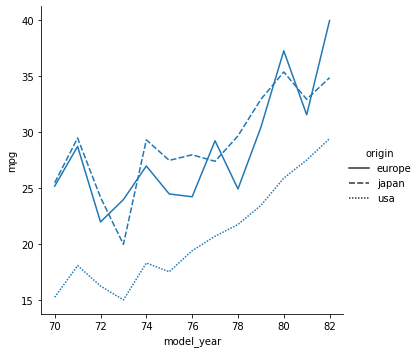

In [84]:
sns.relplot(x="model_year", y="mpg", kind="line", style='origin',ci=None, data=newdata)

5. Consider the following (fake) stock data. Create a line plot from this data with one line for each stock symbol and format the x-axis as a date.

In [89]:
###
np.random.seed(101)
stock_data = pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum(), 
    "symbol": "TRDS"})
stock_data = stock_data.append(pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum(), 
    "symbol": "RISL"}))
stock_data = stock_data.reset_index()
stock_data.head()

,index,time,value,symbol
0,0,2017-01-01,2.706850,TRDS
1,1,2017-01-02,3.334983,TRDS
2,2,2017-01-03,4.242952,TRDS
3,3,2017-01-04,4.746778,TRDS
4,4,2017-01-05,5.397896,TRDS


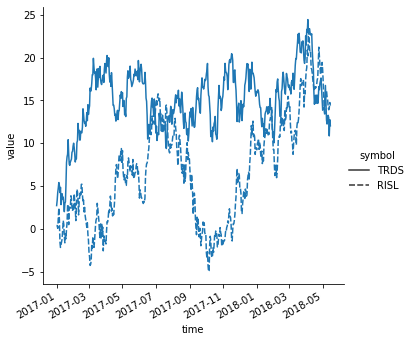

In [92]:
# Haseena
g = sns.relplot(x="time", y="value", kind="line",style='symbol',ci=None ,data=stock_data)
g.fig.autofmt_xdate() 

## Relationships to Categorical Variables
We've already seen how we can show dependence on categorical variables with the various aesthetics in the previous section (`hue`, `size`, and `style`). Often, we may not have two continuous variables to relate to each other, though. For this, we use the `seaborn` function `catplot(...)` which can create multiple kinds of categorical plots.

### Categorical Scatter Plots
The simplest way to represent the relationship between continuous and categorical data is with a categorical scatter plot that represents the distribution of (continuous) values for each category. For this, we can make use of the default value `kind="strip"`.

In [93]:
tips = pd.read_csv("../data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


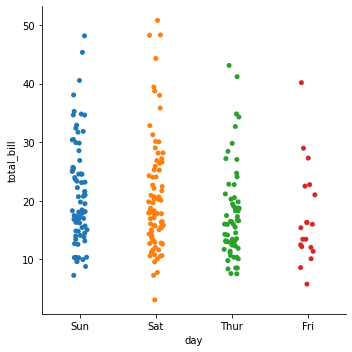

In [94]:
# categorical scatter plot
sns.catplot(x="day", y="total_bill", data=tips)
# ada overlapped datapoints

`seaborn` automatically adds jitter to the points to reduce their overlap. We can adjust this jitter by passing a value between 0 and 1 (exclusive) or eliminate this jitter entirely by passing a boolean `False`. Note that a value of 1 is interpreted as `True` and the default jitter width is used!

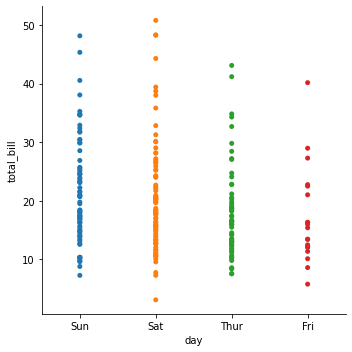

In [95]:
# jitter avoid overlapping points
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)
# strip sesuai utk large dataset

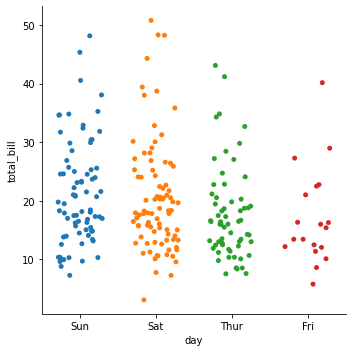

In [96]:
# When a number is passed, this corresponds to a relative width
# jitter=0.5 will typically mean that the "point columns" touch.
sns.catplot(x="day", y="total_bill", jitter=0.3, data=tips)
#obs: orange tu ada lagi byk datapoint
# best value for jitter:0.3, so that ada space between category

We can also prevent point overlap entirely by using a swarm plot. This will create a useful visual approximateion of the distribution of the values.

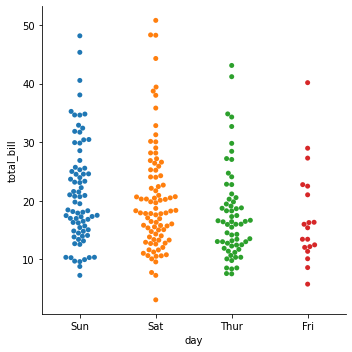

In [97]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)
# lagi nampk dstribution datapoint
# sbb xde overlapping datapoints
# sesuai utk small size dataset

Categorical plots only support the `hue` aesthetic, not the `style` or `size` aesthetics.

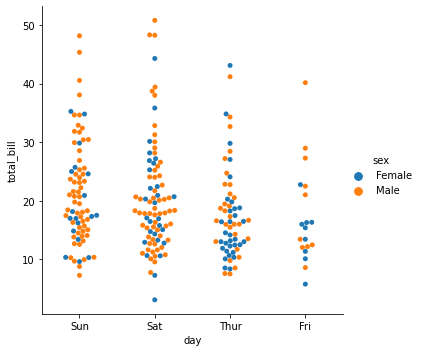

In [98]:
# obs: at sunday, majority is male
sns.catplot(x="day", y="total_bill", kind="swarm", hue="sex", data=tips)

`seaborn` will make assumptions on the nature of your data. For example, if you pass two continuous, numerical variables to `catplot(...)`, it will try to treat the x-axis as a categorical variable.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


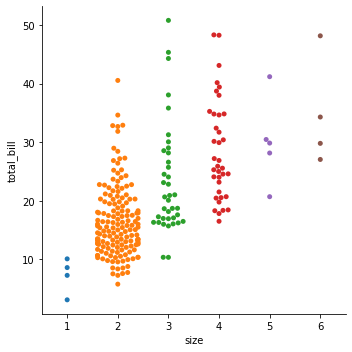

In [99]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


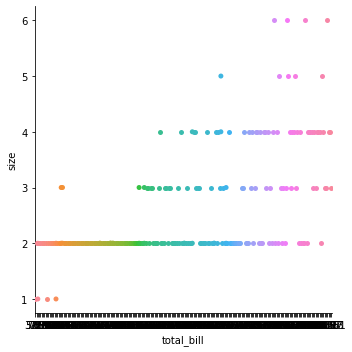

In [100]:
sns.catplot(x="total_bill", y="size", kind="swarm", data=tips)
# seaborn will assume that semua yg kita bagi tu categorical
# size dgn total bill tu both numerical, so x boleh

Notice that this will break `seaborn` if you attempt to place to pseudo-categorical variable onto the y-axis. We can, however, invert our axes if one of the variables is truly categorical, i.e. not numerical.

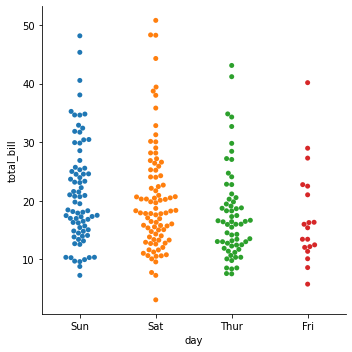

In [101]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)
# at least satu kena categorical

In [ ]:
sns.catplot(x="total_bill", y="day", kind="swarm", data=tips)

### Distribution Plots
Swarm plots are good for approximating distributions, but we often want to have an exact description of the data distribution. For this, we can use box plots and variants thereof.

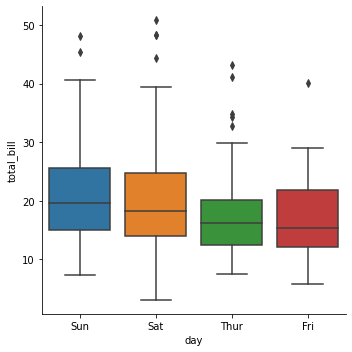

In [102]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
# categorical plot with boxplot utk tgk outlier

Boxplots encode valuable information about our distribution. For each subset of the data, i.e. each box, the following pieces of information are shown:
- The central line of each box represents the median value
- The top and bottom of the boxes are the $3^{rd}$ and $1^{st}$ quantile, respectively.
    - This means that 25% of all values are below the bottom line and 25% are above the top line, i.e. 50% of all values are within the colored region
- The whiskers denote the outlier limits. Any value between the whiskers is considered "normal"
- The points outside of the whiskers are outliers that may require special attention

The `hue` argument can be used to show additional, nested relationships

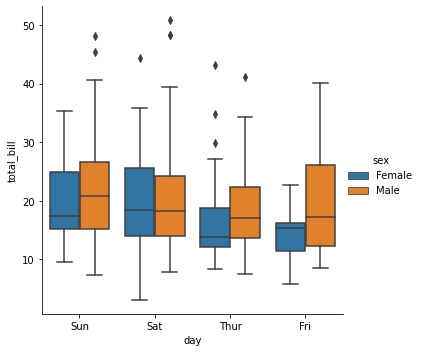

In [103]:
# same median -- same behaviour
sns.catplot(x="day", y="total_bill", kind="box", hue="sex", data=tips)

Note that `hue` assumes a categorical variable when used on `catplot(...)` and `seaborn` will therefore automatically convert numerical variables into categorical ones.

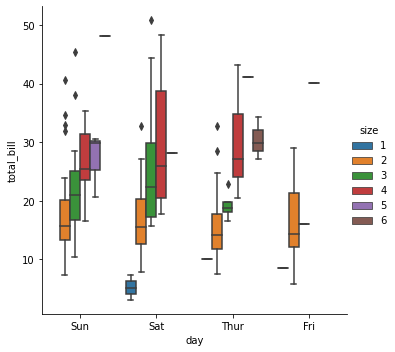

In [104]:
sns.catplot(x="day", y="total_bill", kind="box", hue="size", data=tips)

When quantiles aren't enough, `seaborn` can also display a violin plot. This kind of plot estimates a density and plots it as a distribution

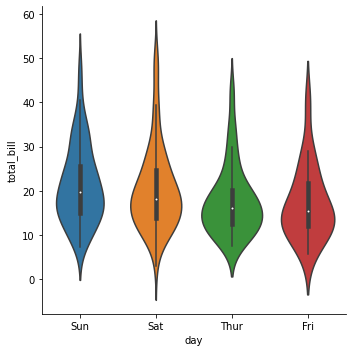

In [105]:
# violin tunjuk distribution --normal/skewness/kurtosis
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)

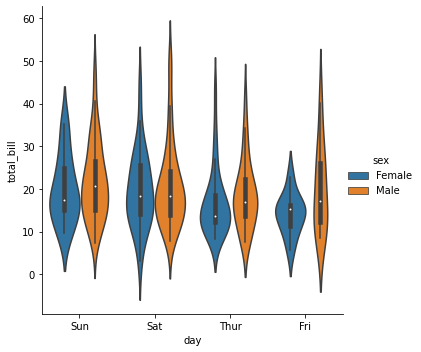

In [107]:
sns.catplot(x="day", y="total_bill", kind="violin",hue='sex', data=tips)

If a variable has only two possible values and is mapped to the hue aesthetic, then `split=True` can be used to combine the two density estimates to compare them more easily.

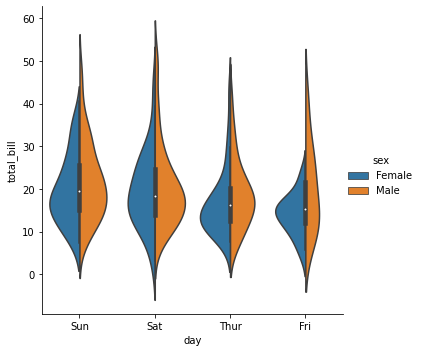

In [106]:
sns.catplot(x="day", y="total_bill", kind="violin", 
            hue="sex", split=True, data=tips)

Violin plots estimate the density. This kernel density estimator (KDE) requires a parameter, called bandwidth, that determines how smooth or how detailed the density plot will be. Understanding violin plots can therefore be more difficult and potentially misleading.

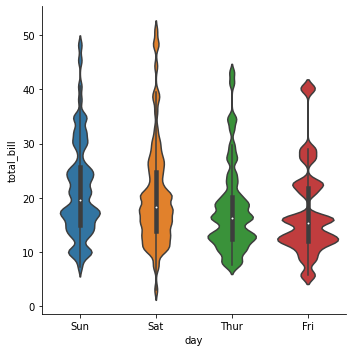

In [108]:
# bw for bandwidth - bagi rupa real data
# sbb data x byk, kita boleh nmpk kat mana yg x cukup sample( part yg kosong dekat violin)
sns.catplot(x="day", y="total_bill", kind="violin", bw=0.1, data=tips)

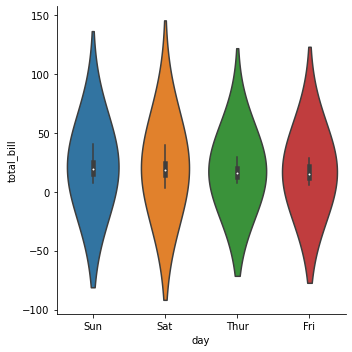

In [109]:
# kalau data cukup, then lawa je rupa dia
sns.catplot(x="day", y="total_bill", kind="violin", bw=5, data=tips)

Violin plots automatically show the corresponding box plot stats inside. We can change this to either showing `sticks`, `points`, or nothing at all.

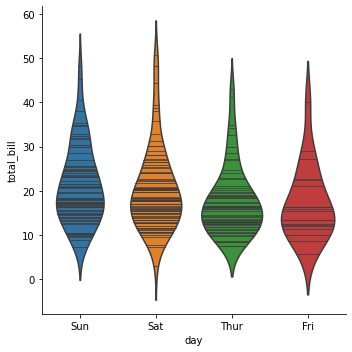

In [110]:
sns.catplot(x="day", y="total_bill", kind="violin", 
            inner="stick", data=tips)
# stick tunjuk kat mana yg data x cukup

In [ ]:
sns.catplot(x="day", y="total_bill", kind="violin", 
            inner="points", data=tips)

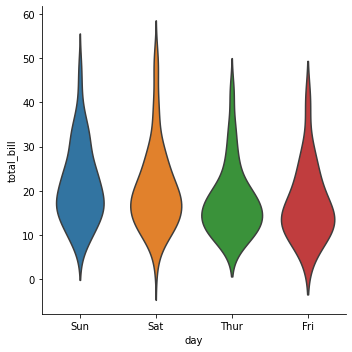

In [111]:
# buang boxplot dlam violin
sns.catplot(x="day", y="total_bill", kind="violin", 
            inner=None, data=tips)

Like with line plots, we may be interested in summary statistics over our data. For this, we can use a bar plot. `seaborn` will compute a summary statistic, such as the mean, as well as confidence intervals for each individual category (denoted by the x-axis).

In [112]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


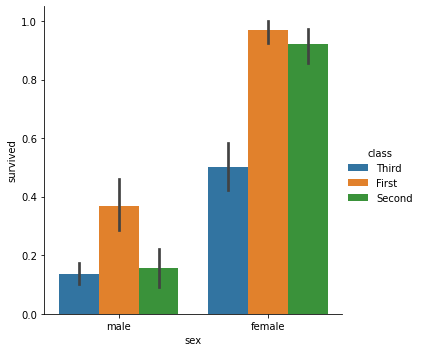

In [113]:
# Compute the mean survival rate for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

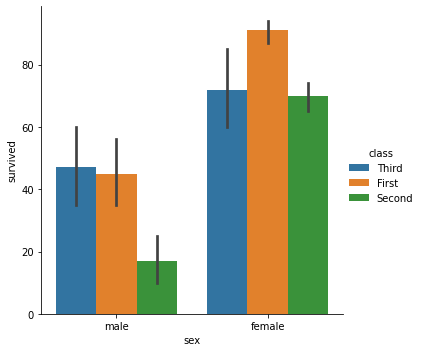

In [114]:
# Compute the total number of survivors for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            estimator=np.sum, data=titanic)

If we're just interested in counting the number of occurances of a single variable, we can use `kind="count"`.

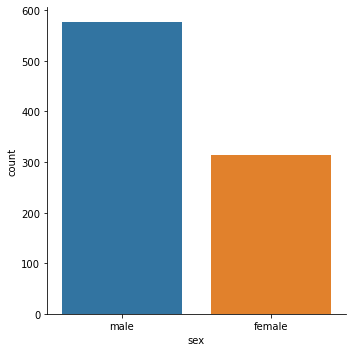

In [116]:
sns.catplot(x="sex", kind="count", data=titanic)

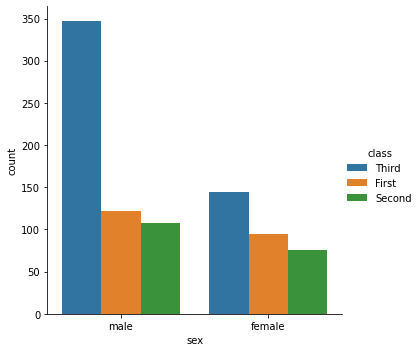

In [115]:
# Count the number of passengers by sex and class -->count plot
sns.catplot(x="sex", hue="class", kind="count", data=titanic)

An alternative to a barplot is a "point plot", which connects groups. This can be used to track pseudo-timeseries data that may only have a few categorical time points, e.g. sales data for 5 years. Notice how it connects data subgroups with the same value of the variable mapped to the `hue` aesthetic (`sex`).

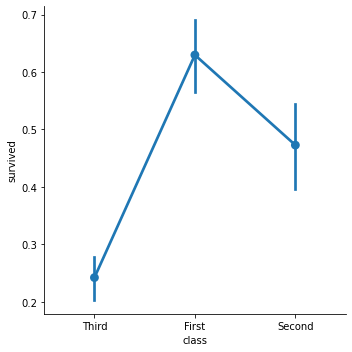

In [118]:
# based on average
# show point estimate and confidence interval using scatterplot
sns.catplot(x="class", y="survived", kind="point", data=titanic)

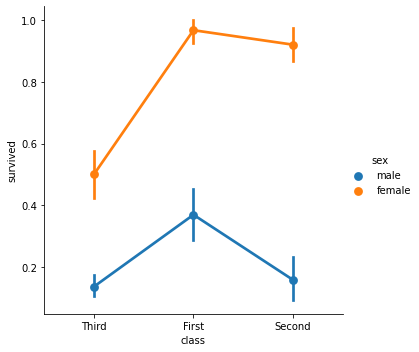

In [117]:
sns.catplot(x="class", y="survived", hue="sex", kind="point", data=titanic)

As before, we can also change the estimator and confidence interval method for point plots.

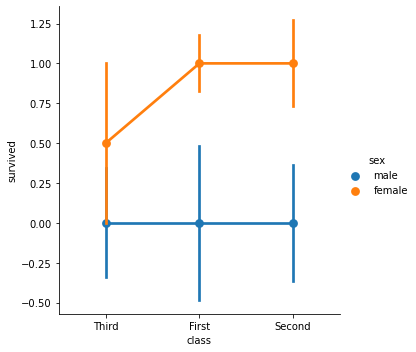

In [119]:
sns.catplot(x="class", y="survived", hue="sex", kind="point", 
            estimator=np.median, ci="sd", data=titanic)

### Exercises

1. Load the `diamonds.csv` dataset and create a categorical scatter plot that relates the price to the cut

In [120]:
# Haseena
diamond = pd.read_csv('../data/diamonds.csv')
diamond.head()
sns.catplot(x="cut", y="price", data=diamond)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


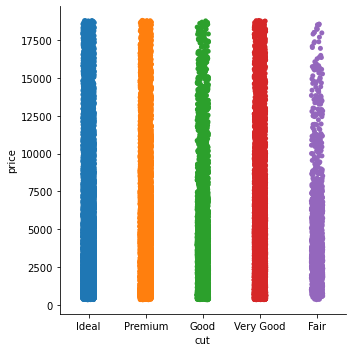

In [121]:
sns.catplot(x="cut", y="price", data=diamond)

2. Change the jitter width of the previous plot so that the dot-columns are touching.

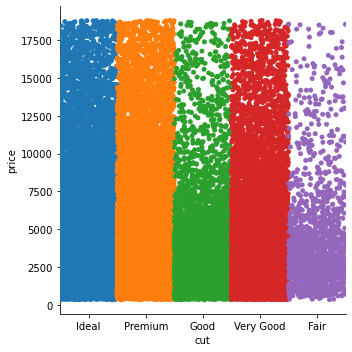

In [124]:
# Haseena
sns.catplot(x="cut", y="price", jitter=0.5, data=diamond)
# nak touch je, xnak overlap

3. This time, create a box plot that relates the carats to the clarity

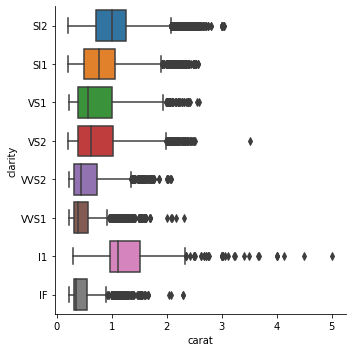

In [126]:
# Haseena
sns.catplot(x="carat", y="clarity", kind='box', data=diamond)

4. Create a subset of the diamonds data consisting of only diamonds with colors of "J" (worst) and "D" (best) and only with clarity "IF". 
  
  *Hint:* We can combine boolean masks for Pandas like so: `diamonds.loc[(condition1) & (condition2)]`
  
  Create a violin plot relating the price to the clarity and map the color to the `hue` aesthetic. Make sure the density estimates for each color are combined in each violin.

In [132]:
diamond_sub = diamond.loc[((diamond['color'] =='J')|(diamond['color'] =='D')) & ( diamond['clarity'] == 'IF')]

,carat,cut,color,clarity,depth,table,price,x,y,z
3342,0.50,Good,D,IF,63.2,59.0,3378,4.99,5.04,3.17
3343,0.50,Very Good,D,IF,62.9,59.0,3378,4.99,5.09,3.17
3680,0.51,Ideal,D,IF,62.0,56.0,3446,5.14,5.18,3.20
3682,0.51,Ideal,D,IF,62.1,55.0,3446,5.12,5.13,3.19
3734,0.35,Ideal,J,IF,61.8,55.0,569,4.54,4.56,2.81
...,...,...,...,...,...,...,...,...,...,...
50671,0.34,Ideal,D,IF,62.1,57.0,2287,4.46,4.52,2.79
50672,0.34,Ideal,D,IF,59.8,57.0,2287,4.57,4.59,2.74
51173,0.34,Ideal,D,IF,62.1,57.0,2346,4.52,4.46,2.79
51174,0.34,Ideal,D,IF,59.8,57.0,2346,4.59,4.57,2.74


In [ ]:
sns.catplot(x = 'clarity', y='price', kind='violin',hue='color')

5. Play with the bandwidth parameter (`bw`) for the previous plot. How can you interpret the plot for `bw=0.01`, `bw=0.1`, and `bw=1`?

In [ ]:
###

6. Using the full diamond dataset again, use a bar plot to determine how many diamonds there are of each cut.

In [ ]:
###

## Element Ordering -- arrange susunan legend
All of the above plots allow us to customize the order of elements, both on the axes as well as for the aesthetics. Naturally, the functions will only enable ordering aesthetics that are supported, e.g. `catplot(...)` has no `size_order` or `style_order` arguments and `relplot(...)` has no `order` argument as both axes depict continuous values.

In [ ]:
# Compute the mean survival rate for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            order=["female", "male"], data=titanic)

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            order=["female", "male"], data=titanic, 
            hue_order=["First", "Second", "Third"])

In [ ]:
sns.relplot(
    x="total_bill", y="tip", hue="smoker", size="day", style="time",
    style_order=["Lunch", "Dinner"], 
    size_order=["Thur", "Fri", "Sat", "Sun"], 
    hue_order=["Yes", "No"], data=tips)

## Faceting - display multiple plot
We can also instruct the functions `relplot(...)` and `catplot(...)` to create multiple plots if we simply have too much detail to show in one. The parameters `col=...` and `row=...` let us further split apart the data and show subsets in individual plots.

In [ ]:
titanic.head()

In [ ]:
# Compute the total number of survivors for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", 
                  kind="bar", col="embark_town", data=titanic)

In [ ]:
tips.head()

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="sex",
            row="day", col="smoker", data=tips)

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="sex",
            row="day", col="smoker", data=tips, 
            row_order=["Thur", "Fri", "Sat", "Sun"]
           col_order=['Yes','No'])

## Under the Hood
`seaborn` is a high-level interface for `matplotlib`. The two functions introduced here call other, intermediate functions, which in turn call `matplotlib` functions.

- `relplot(kind=...)`
    - **scatter**: `scatterplot()` --> `matplotlib.pyplot.scatter()`
    - **line**: `lineplot()` --> `matplotlib.pyplot.line()`
- `catplot(kind=...)`
    - **strip**: `stripplot()` --> Calls multiple `matplotlib` functions
    - **swarm**: `swarmplot()` --> Calls multiple `matplotlib` functions
    - **box**: `boxplot()` --> Calls `matplotlib.pyplot.boxplot()`
    - **violin**: `violinplot()` --> Calls multiple `matplotlib` functions
    - **bar**: `barplot()` --> Calls `matplotlib.pyplot.bar()`
    - **count**: `countplot()` --> Calls `matplotlib.pyplot.bar()`
    - **point**: `pointplot()` --> Calls multiple `matplotlib` functions
    
`seaborn` is essentially a "convenience" to make `matplotlib` more accessible.

In [4]:
import matplotlib.pyplot
import seaborn as sns
import pandas as pd
titanic = pd.read_csv('../data/titanic.csv')

In [ ]:
sns.scatterplot(x = 'total_bill', y='tip', data = tips,hue='day')

## Customizing Plots

### Plot Text and Axis Labels
Customizing the text of axis labels is unfortunately not as intuitive as building the plots. This is because `seaborn` builds heavily on `matplotlib` but attempts to reduce the fine granularity of building a plot with the latter. For example, to create the facetted plots above using `matplotlib`, we would have to subset the data into all possible variants, build each individual plot, arrange them in a grid, and then add the legend and axis titles. `seaborn` makes this step somewhat easier, but cannot get around this granularity when it comes to customizing plots.

**Title**

Text(0.5, 0.98, 'Titanic Survivors')

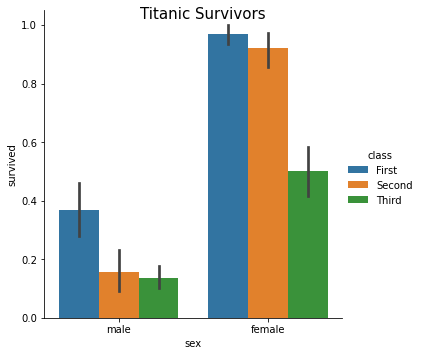

In [5]:
# Look at documentation for more info
# save the plot into myFigure
myFigure = sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], data=titanic)
myFigure.fig.suptitle("Titanic Survivors", fontsize=15)

**Change Label of Legend**

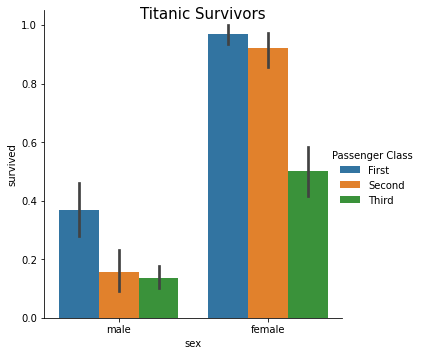

In [6]:
myFigure._legend.set_title("Passenger Class")
myFigure.fig

Legend labels are stored as `Text(...)` elements

In [7]:
myFigure._legend.texts

[Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')]

We can change these by calling `*.set_text(...)` on each of them

In [8]:
myFigure._legend.texts[0].set_text("1st")
myFigure._legend.texts[1].set_text("2nd")
myFigure._legend.texts[2].set_text("3rd")
myFigure._legend.texts

[Text(0, 0, '1st'), Text(0, 0, '2nd'), Text(0, 0, '3rd')]

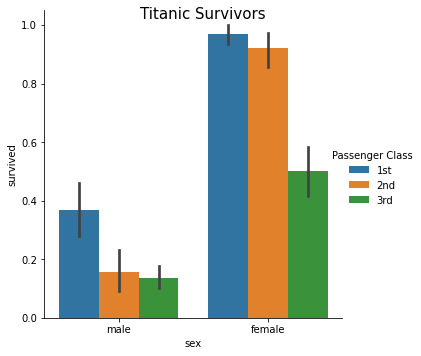

In [9]:
myFigure.fig

**Axis Labels**

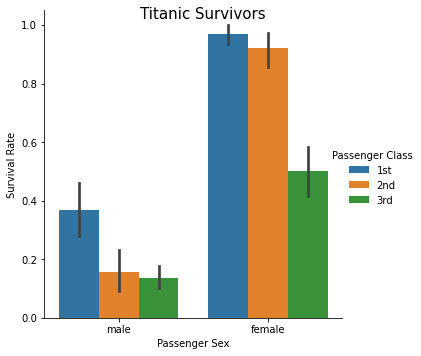

In [10]:
# change x and y axes labels
myFigure.set_axis_labels(x_var="Passenger Sex", y_var="Survival Rate")
myFigure.fig

We can set the value of categorical tick labels as follows:

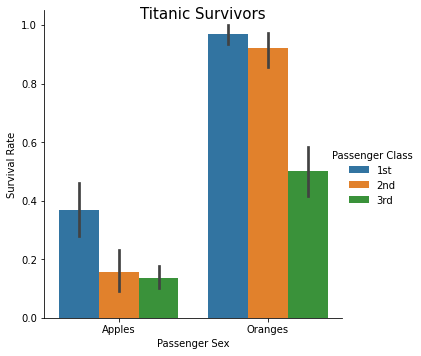

In [11]:
myFigure.set_xticklabels(labels=["Apples", "Oranges"])
myFigure.fig

**Rotate Tick Labels**

In some cases, tick labels may be too dense and must be rotated

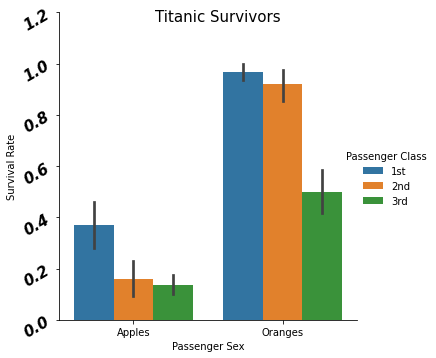

In [16]:
# rotate label and bold
myFigure.set_yticklabels(rotation=30,weight='bold',fontsize=15, fontstyle='italic')
myFigure.fig

### Axis Limits
We use `matplotlib` to set our axis limits

In [17]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)
# nak zoom specific part of the plot
plt.xlim(20, 40) # (min,max) range yg kita nak,ikut range axis
plt.ylim(2, 8)


NameError: name 'tips' is not defined

### Color
There are far more methods of creating and choosing color palettes in `seaborn` than could possibly be shown here.

In general, we set the colors of our plot with the parameter `palette=...`. The simplest way to do this is to define a dictionary relating the aesthetic names (here the passenger class) to colors. The colors can be given either as a string (insofar as the color is known to seaborn), in hexadecimal format indicating the color channel intensities (`#RRGGBB`), or as a tuple/list with 3 values indicating the color mixing (`[r, g, b]`, values should be between 0 and 1)

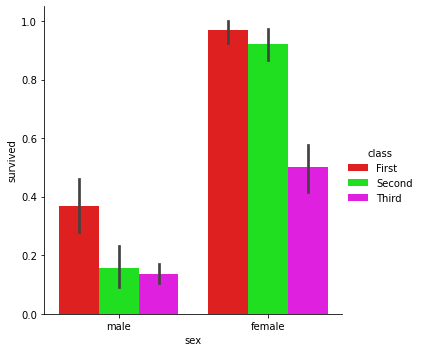

In [21]:
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette=["red", "#00FF00", (1, 0, 1)],
    data=titanic)
# hexadecimal colour code #00FF00
# rgb colour mixing (0, 0.2, 1)

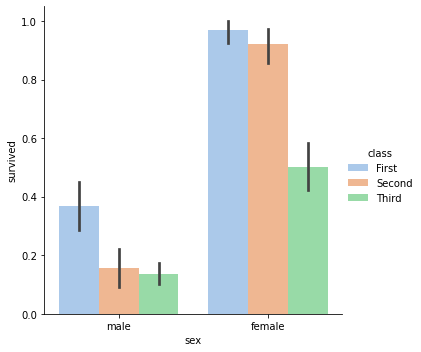

In [26]:
# set predefined colours --> deep, muted, pastel, bright, colorblind
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette='pastel',
    data=titanic)

xkcd produces a set of [954 named colors](https://xkcd.com/color/rgb/) to name random RGB colors. 

This becomes tiresome for many categories so `seaborn` offers several functions to generate color palettes automatically. Some of these include:

- `sns.cubehelix_palette(...)`
- `sns.diverging_palette(...)`
- `sns.dark_palette(...)`
- `sns.light_palette(...)`
- Any of the [ColorBrewer](http://colorbrewer2.org) presets
- ... and many more

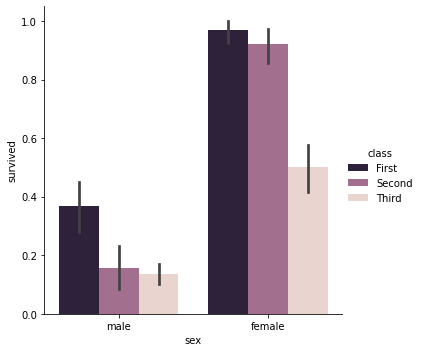

In [28]:
cmap = sns.cubehelix_palette(3, reverse = True)
# kalau 3 bar, then set jadi 3, reverse order of colour shade
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette=cmap,
    data=titanic)

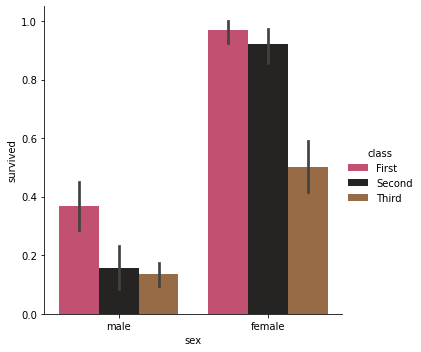

In [35]:
cmap = sns.diverging_palette(0,39, n=3, center = 'dark' )
# range of h_pos, h_neg --> pilih range [0,359]
# kalau nak center color dark
sns.catplot(
    x="sex", y="survived", hue= "class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette=cmap,
    data=titanic)

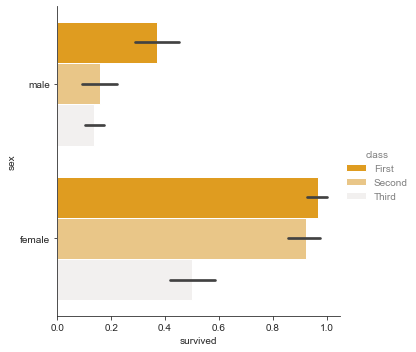

In [48]:
cmap = sns.light_palette('orange', reverse = True, n_colors = 3)
# tgk documentation
sns.catplot( # tukar axis utk buat horizontal plot
    y="sex", x="survived", hue= "class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette=cmap,
    data=titanic)

## Themes
Beyond color, `seaborn` also has support for themes. There are five built-in seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. They can be invoked with `sns.set_style(...)`

In [41]:
tips = pd.read_csv('../data/tips.csv')

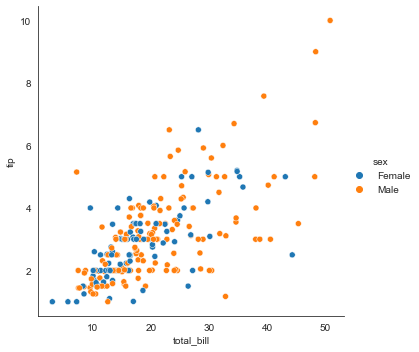

In [43]:
#sns.set_style("dark") # dark background
sns.set_style("white") # white background
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

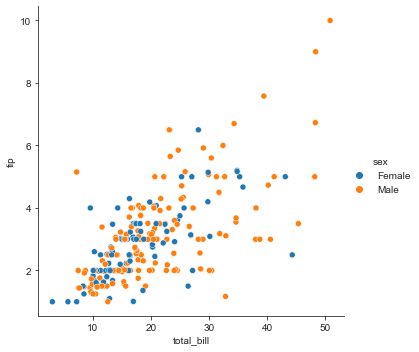

In [44]:
sns.set_style("ticks")
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

We can edit these styles to our liking. Note that the floating point numbers are actually strings!

In [46]:
# See current style details
sns.set_style("ticks")
sns.axes_style() # contohnya nak tukar tick color (0.15 = darker)

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

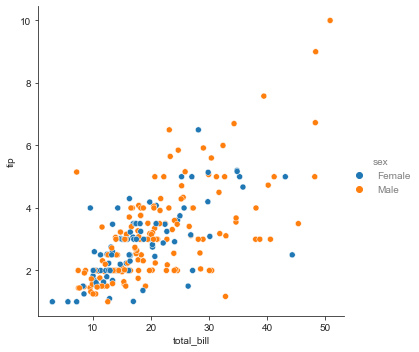

In [47]:
# Overwrite styles --> text color dkat legend= 1 (lighter)
sns.set_style("ticks", {"text.color": '0.5'})
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

Lastly, we can also use `sns.set(...)` to tweak our plots, such as font size scaling.

In [ ]:
# Overwrite styles
sns.set(font_scale=1)
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

## Saving Plots
Typically, an analysis pipeline won't run in Jupyter, or any other interactive environment, but as a script that generates a report. We can use `seaborn` to this end by saving our plots.

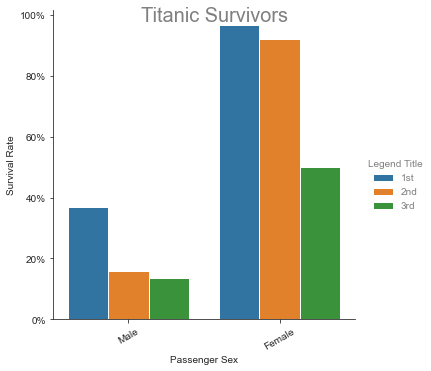

In [50]:
import matplotlib.pyplot as plt
myFigure = sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    order=["male", "female"], data=titanic, ci=None)
myFigure.fig.suptitle("Titanic Survivors", fontsize=20)
myFigure._legend.set_title("Legend Title")
myFigure._legend.texts[0].set_text("1st")
myFigure._legend.texts[1].set_text("2nd")
myFigure._legend.texts[2].set_text("3rd")
myFigure.set_axis_labels(x_var="Passenger Sex", y_var="Survival Rate")
myFigure.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, y: "{:.0f}%".format(x*100)))
myFigure.set_xticklabels(labels=["Male", "Female"])
myFigure.set_xticklabels(rotation=30)

# Save the plot in all its glory
# myFigure.savefig("output.png")
myFigure.savefig("output.pdf") # save as pdf

`seaborn` supports saving both in bitmap format, e.g. PNG, as well as in vector format, e.g. PDF.

## Exercises

1. Using the full diamond dataset again, use a bar plot to determine how many dimaonds there are of each clarity. Create facets for the cut (columns) and color (rows)

In [53]:
diamond = pd.read_csv('../data/diamonds.csv')
diamond.head()
sns.catplot( # tukar axis utk buat horizontal plot
    y="sex", x="survived", hue= "clarity", kind="bar",
    data=diamond)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
sns.catplot(x="carat", y="price", hue="clarity", 
                  kind="bar", col="cut",row='color' ,data=diamond)

2. Create a box plot that relates the carats to the clarity and place the boxes in the correct order (I1 , SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

In [ ]:
###

3. Plot the relationship between the `x` and `y` columns of the `diamonds` dataframe. Limit the x-axis to the interval \[3, 11] and the y-axis to the interval \[0, 15] to remove outliers

In [ ]:
###

4. Load the `exercise.csv` dataset. 
  1. Plot the relationship between the pulse and diet as a boxplot. 
  2. Map the kind of exercise to the `hue`
  3. Facet the data into columns so that we have one plot for each timepoint

In [ ]:
###

<center><b>Open Exercise</b></center>

5. Using the dataset `tips`, plot any relationship between variables you find worth investigating and make the figure "presentation-ready". That means:
  - Use aesthetics (`hue`, `style`, `size`) and facets where appropriate. 
  - Create a figure title and label the axes and legend. 
  - Format tick marks if necessary.
  - Edit tick labels and legend entries if necessary.
  - Find a visually appealing color palette.
  - Choose one of the base themes and play around with the options to them until they are to your liking.
  
  Save your plot as "output.png" and "output.pdf" and compare the two images. What happens to them when you zoom in very close?

In [ ]:
###